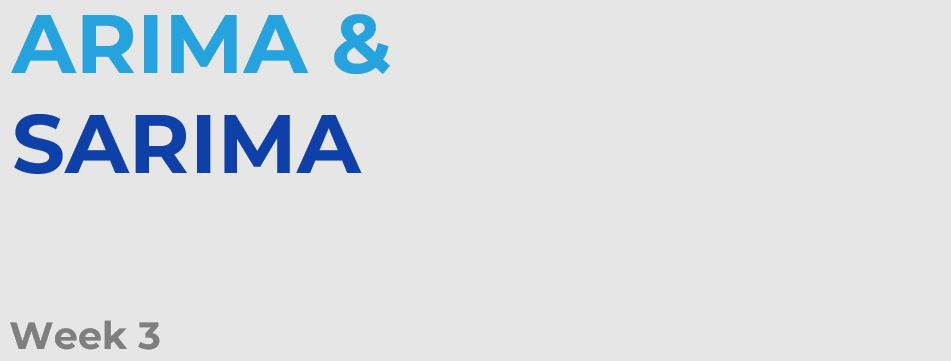

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## <font color='blue'>AR / ARMA / ARIMA / SARIMA concepts can be understood through the below Case Study: </font>


### Problem Statement:
**The below dataset is having the monthly Sales data for the days Trucks of a certain company are being sold for the year 2022. The objective of this problem is to build a ARIMA/SARIMA forecasting model to forecast next 3 years of future sales**



#### <u> Import libraries </u>


In [1]:
import sys
import warnings
import itertools
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

#### <u>Load CSV</u>

In [2]:
data = pd.read_csv("Truck_sales.csv")
data.head(5)

,Month-Year,Number_Trucks_Sold
0,03-Jan,155
1,03-Feb,173
2,03-Mar,204
3,03-Apr,219
4,03-May,223


#### <u>Code to convert/split the data as per frequency.</u>

In [3]:
dates = pd.date_range(start='2003-01-01', freq='MS', periods=len(data))

In [4]:
import calendar
data['Month'] = dates.month
data['Month'] = data['Month'].apply(lambda x: calendar.month_abbr[x]) #spltting into english month names 
data['Year'] = dates.year

In [5]:
data.drop(['Month-Year'], axis=1, inplace=True)
data.rename(columns={'Number_Trucks_Sold':'Truck-Sales'}, inplace=True)
data = data[['Month', 'Year', 'Truck-Sales']]

In [6]:
data.set_index(dates, inplace=True)

In [7]:
data.head(5)

,Month,Year,Truck-Sales
2003-01-01,Jan,2003,155
2003-02-01,Feb,2003,173
2003-03-01,Mar,2003,204
2003-04-01,Apr,2003,219
2003-05-01,May,2003,223


#### <u>Code to extract the time-series and plot it, and provide the inferences accordingly.</u>

In [8]:
# extract out the time-series
sales_ts = data['Truck-Sales']

Text(0, 0.5, 'Truck Sales')

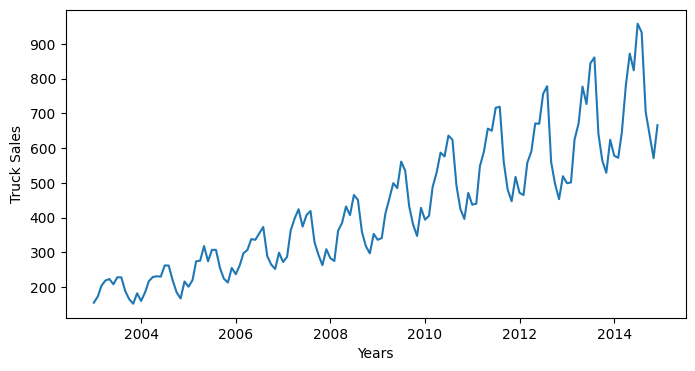

In [9]:
plt.figure(figsize=(8, 4))
plt.plot(sales_ts)
plt.xlabel('Years')
plt.ylabel('Truck Sales')

#### Inference :

*We observe both trend and multiplicative seasonaliy from the plot shown above.*

## Concept Of Stationarity 
**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

- A Time Series is considered to be stationary **when statistical properties such as the variance and (auto) correlation are constant over time.**


- Stationary Time Series allows us to think of the statistical properties of the time series as not changing in time, which enables us to build appropriate statistical models for forecasting based on past data. 


- Stationarity means that the **autocorrelation of lag ‘k’ depends on k, but not on time t.** 

    - <font color='blue'> Let $𝑋_𝑡$  denote the time series at time t.

    - Autocorrelation of lag k is the correlation between $𝑋_{𝑡}$  and $𝑋_{(𝑡−𝑘)}$</font> 




## How to check for Stationarity?


**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**<font color='blue'>Dickey-Fuller Test</font>** - Dicky Fuller Test on the timeseries is run to check for stationarity of data. 

- **Null Hypothesis $H_{0}$**: Time Series is non-stationary.
- **Alternate Hypothesis $𝑯_{𝒂}$**: Time Series is stationary.

*So Ideally if p-value < 0.05 then null hypothesis: TS is non-stationary is rejected else the TS is non-stationary is failed to be rejected .*



**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**


In [10]:
from statsmodels.tsa.stattools import adfuller

In [11]:
dftest = adfuller(sales_ts)#python implementation of dicky fuller test 
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is 1.116
DF test p-value is 0.9954


 ***the p-value 0.99 is very large, and not smaller than 0.05 and thus is not a stationary series.***

#### <u>Basic Bivariate Analysis</u>

*Performing the decomposition of data if there is an existence of seasonality and split the data accordingly.*

Observe how number of Trucks sold vary on a month on month basis. A stacked plot for every year will give us a clear pattern of any seasonality over the many years and those changes will be clearly reflected in the plots. 

In [12]:
monthly_sales_data = pd.pivot_table(data, values = "Truck-Sales", columns = "Year", index = "Month")
monthly_sales_data

Year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Month,,,,,,,,,,,,
Apr,219,229,276,307,398,385,455,530,590,590,671,781
Aug,228,262,307,373,419,451,535,624,719,778,861,933
Dec,182,216,255,299,309,353,428,471,517,519,624,666
Feb,173,185,220,263,287,275,341,405,440,465,501,572
Jan,155,160,201,237,272,283,336,394,437,471,499,578
Jul,228,262,307,354,407,465,561,636,716,756,844,958
Jun,208,230,274,336,374,407,485,576,650,670,727,824
Mar,204,217,274,297,363,362,411,488,548,558,625,646
May,223,231,318,338,424,432,499,587,656,671,777,872


In [13]:
monthly_sales_data = monthly_sales_data.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
monthly_sales_data

Year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Month,,,,,,,,,,,,
Jan,155,160,201,237,272,283,336,394,437,471,499,578
Feb,173,185,220,263,287,275,341,405,440,465,501,572
Mar,204,217,274,297,363,362,411,488,548,558,625,646
Apr,219,229,276,307,398,385,455,530,590,590,671,781
May,223,231,318,338,424,432,499,587,656,671,777,872
Jun,208,230,274,336,374,407,485,576,650,670,727,824
Jul,228,262,307,354,407,465,561,636,716,756,844,958
Aug,228,262,307,373,419,451,535,624,719,778,861,933
Sep,188,219,255,289,329,359,432,492,560,560,641,704


To represent the distribution of the data, if there is an existence of seasonality in a visualisation plot and provide inferences accordingly.

<AxesSubplot: xlabel='Month'>

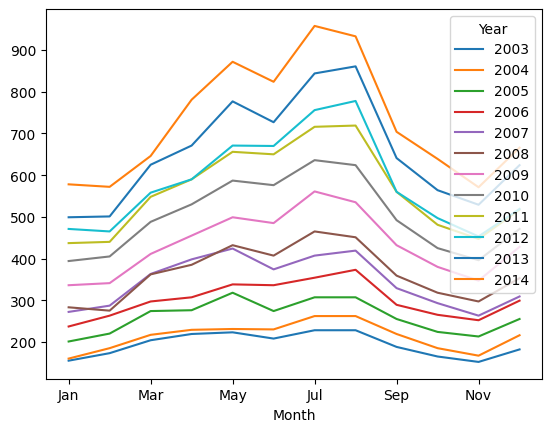

In [14]:
monthly_sales_data.plot()

In [15]:
yearly_sales_data = pd.pivot_table(data, values = "Truck-Sales", columns = "Month", index = "Year")
yearly_sales_data = yearly_sales_data[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
yearly_sales_data

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2003,155,173,204,219,223,208,228,228,188,165,152,182
2004,160,185,217,229,231,230,262,262,219,185,167,216
2005,201,220,274,276,318,274,307,307,255,224,213,255
2006,237,263,297,307,338,336,354,373,289,265,252,299
2007,272,287,363,398,424,374,407,419,329,293,263,309
2008,283,275,362,385,432,407,465,451,359,318,297,353
2009,336,341,411,455,499,485,561,535,432,380,347,428
2010,394,405,488,530,587,576,636,624,492,425,396,471
2011,437,440,548,590,656,650,716,719,560,481,447,517


<AxesSubplot: xlabel='Year'>

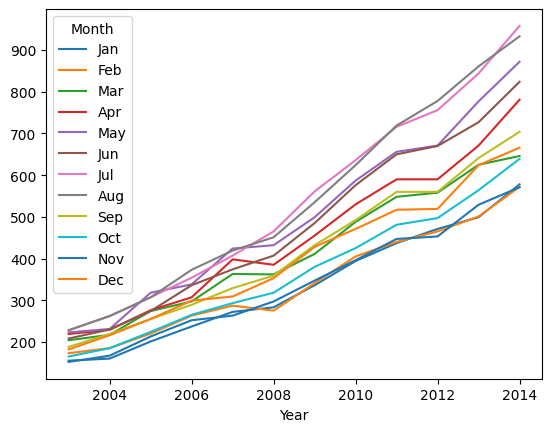

In [16]:
yearly_sales_data.plot()

<AxesSubplot: >

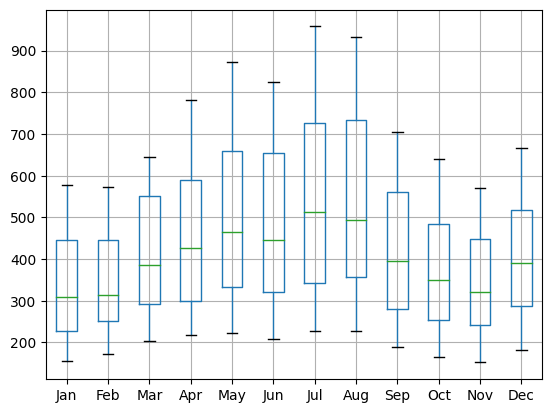

In [17]:
yearly_sales_data.boxplot()

#### Inferences:

- *The Truck sales have been increasing every year.*
- *July/August are the peak months for sales* 
- *Variance & Mean values in the above 2 months are also higher than any of the other months.*
- *12 months seasonal cycle is present as mean of each month year on year starts with an increasing trend in the beginning of the year and drops down towards the end of the year.*

#### <u>Time Series Decomposition</u>

In [18]:
decomposition = sm.tsa.seasonal_decompose(sales_ts, model='multiplicative')

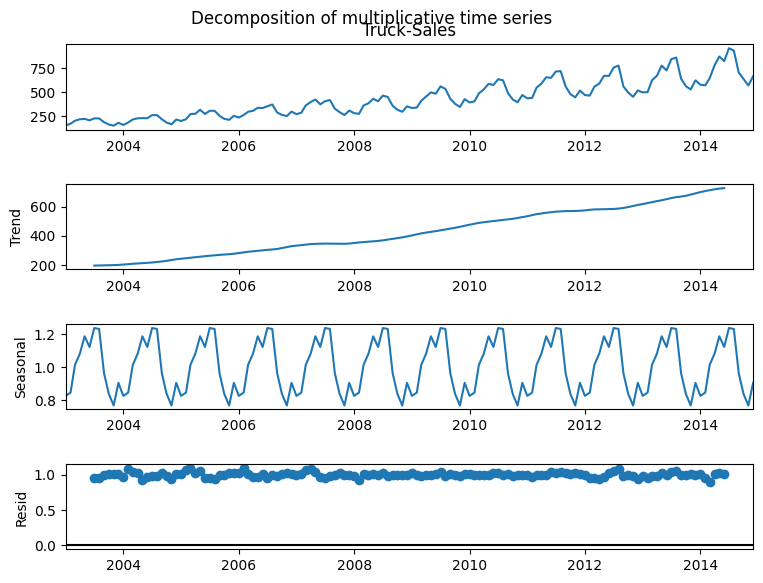

In [19]:
fig = decomposition.plot()
fig.set_figwidth(8)
fig.set_figheight(6)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()

#### Some of our key observations from this analysis:

1) *Trend: 12-months MA is a fairly straight line indicating a linear trend.*

2) *Seasonality: seasonality of 12 months is clearly visible*
 
3) *Irregular Remainder (random): The multiplicative model works as there are no patterns in the residuals*

## How to Make a Time Series Stationary ? - Differencing 'd'

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

- Differencing **'d'** is done on a non-stationary time series data one or more times to convert it into stationary. 



- **(d=1) 1st order differencing is done where the difference between the current and previous (1 lag before) series is taken and then checked for stationarity using the ADF(Augmented Dicky Fueller) test. If differenced time series is stationary, we proceed with AR modeling. Else we do (d=2) 2nd order differencing, and this process repeats till we get a stationary time series** 

    - <font color='blue'> 1st  order differencing equation is : $𝒚_{𝒕} = 𝒚_{𝒕} − 𝒚_{𝒕-1}$
	- 2nd order differencing equation is : $𝒚_{𝒕} = (𝒚_{𝒕} − 𝒚_{𝒕-1}) − (𝒚_{𝒕-1} -y_{t-2})$		and so on…</font>


- The variance of a time series may also not be the same over time.   To remove this kind of non-stationarity, we can transform     the data. **If the variance is increasing over time, then a log transformation can stabilize the variance.** 


**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**


####  Non differenced full data Time series

Text(0, 0.5, 'Truck Sales')

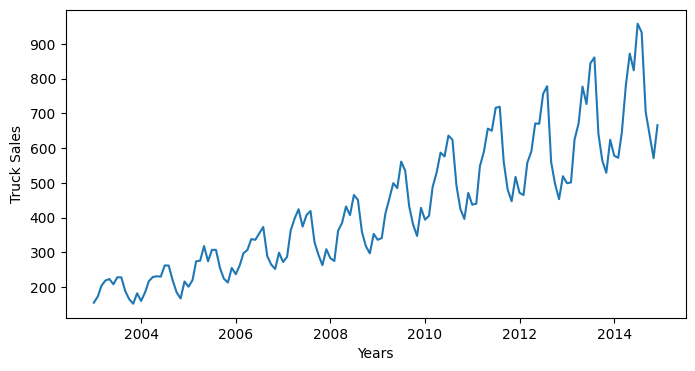

In [20]:
plt.figure(figsize=(8, 4))
plt.plot(sales_ts)
plt.xlabel('Years')
plt.ylabel('Truck Sales')

#### Performing differencing ( d=1 ) as the data is non-stationary

Text(0, 0.5, 'Truck Sales')

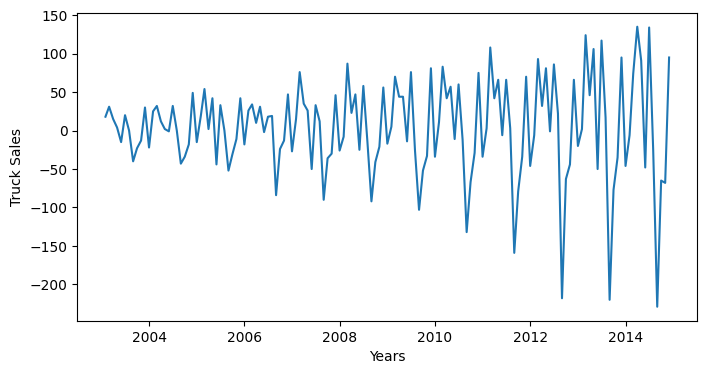

In [21]:
plt.figure(figsize=(8, 4))
plt.plot(sales_ts.diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Truck Sales')

*We observe seasonality even after differencing. Meaning the variance in the data seemss to be increasing.* 


**This suggests a log transformation of the data.**

Text(0, 0.5, 'Log (Truck Sales)')

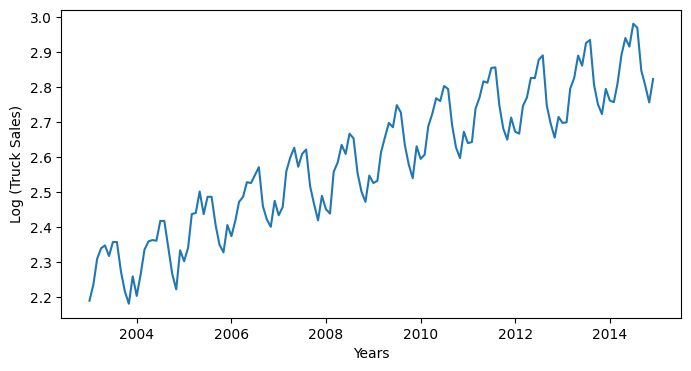

In [22]:
plt.figure(figsize=(8, 4))
plt.plot(np.log10(sales_ts))
plt.xlabel('Years')
plt.ylabel('Log (Truck Sales)')

*We observe trend and seasonality even after taking log of the observations.*

**Performing differencing (d=1) on the log transformed time series**

Text(0, 0.5, 'Differenced Log (Truck Sales)')

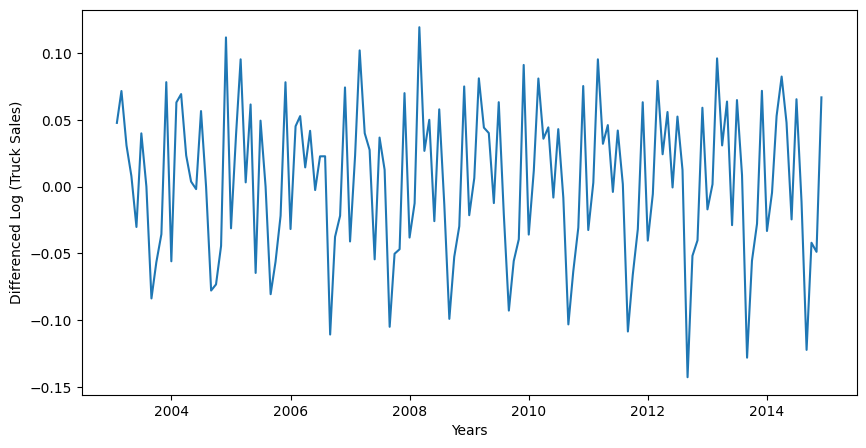

In [23]:
plt.figure(figsize=(10, 5))
plt.plot(np.log10(sales_ts).diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Differenced Log (Truck Sales)')

## Auto Regressive(AR) Models 

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

- Autoregression means **regression of a variable on itself** which means **Autoregressive models use previous time period values to predict the current time period values.**


- One of the fundamental assumptions of an AR model is that the **time series is assumed to be a stationary process.**


- An AR(p) model (Auto-Regressive model of order p) can be written as: 

## <font color='blue'> $y_{t}$ =   $φ_{1} y_{t-1} + φ_{2}y_{t-2} + ……+ φ_{p} y_{t-p} + ε_{t}$</font>

- <font color='blue'>$ε_{t}$ </font>**is an error term which is an independent and identically distributed random variable (or in other words, a white noise) with the parameters mean = 0 and standard deviation = σ**
- The <font color='blue'>φ </font>**are regression coefficients multiplied by lagged time series variable, which captures the effect of the input variable on the output, provided intermediate values do not change.**


**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Choose the order 'p' of AR model

- We look at the Partial Autocorrelations of a stationary Time Series to understand the order of Auto-Regressive models.


- For an AR model, 2 ways to identify order of 'p':


<i>1) **PACF Approach** :  the PACF method where the  (Partial Auto Correlation Function) values cut off and become zero after a certain lag.               PACF vanishes if there is no regression coefficient that far back. The cut-off value where this happens can be taken             as the order of AR as ‘p’. This can be seen from a PACF plot.</i>

- <i>If the 2nd PACF vanishes (cut off in PACF) then the 2nd coefficient is not considered and thus ‘p’ is 1.</i>
- <i>If the 3rd PACF vanishes (cuts off in PACF) then the 3rd coefficient is not considered and thus ‘p’ is 2 and so on…</i>



 - **Partial Autocorrelation of order 2 = Partial autocorrelation of lag 2 = Correlation between $𝑋_{𝑡}$ and $𝑋_{𝑡−2}$ holding $𝑋_{𝑡−1}$ fixed.**


<font color='blue'><i>2) **Lowest AIC Approach** : **the lowest Akaike Information Criteria (AIC) value compared among different orders of ‘p’ is considered.** </i></font>


**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

#### Using the 2nd method(Lowest AIC) to compare different orders of 'p'

In [24]:

# Define the p parameter to take any value between 0 and 2
p= range(1,4)


## Moving Average(MA) Models 

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

- Moving average model **considers past residual values to predict the current time period values.** 
  These past residuals are past prediction errors.
    

- For a MA model, **the residual or error component is modeled.**


- The moving average model MA(q) of  order q can be represented as:


## <font color='blue'>$y_{t} =  ε_{t} + θ_{1}ε_{t-1} +……+ θ_{q}ε_{t-q}$</font>

- **Where $y_{t}$  time series variable, θ are numeric coefficients multiplied to lagged residuals and ε is the residual term considered as a purely random process with mean 0, variance $σ^{2}$ and  $Cov(ε_{t-1},ε_{t-q})$ = 0.**

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Choose the order 'q' of MA model

- We look at the Autocorrelations of a stationary Time Series to understand the order of Moving Average models.


- For a MA model,  

<i>1) **ACF Approach** : ACF (Autocorrelation Function) values cut off at a certain lag. ACF vanishes, and there are no coefficients that far back; thus, the cut-off value where this happens is taken as the order of MA as ‘q’. This can be seen from the ACF plot.</i>



<i>2) <font color='blue'>**Lowest AIC Approach** : the lowest Akaike Information Criteria (AIC) value compared among different orders of ‘q’ is considered. </i></font>


**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

#### Using the 2nd method(Lowest AIC) to compare different orders of 'q'

In [25]:

# Define the q parameter to take any value between 0 and 2
q = range(1, 4)


### WHY?

- <font color='blue'>**ACF(0)=1**</font>


- <font color='blue'>**ACF(1)=PACF(1)**</font>

#### <u> Parameter </u>   (p, d, q)   <u>estimation matrix for estimating parameters towards building AR / ARMA / ARIMA / SARIMA models </u>

In [26]:


d= range(0,2)

#Generate all different combinations of p with d=0 and q=0 triplets for AR model building
pdq_ar = list(itertools.product(p, range(1), range(1)))

#Generate all different combinations of p,q with d=0 triplets for ARMA model building
pdq_arma = list(itertools.product(p, range(1),q))

#Generate all different combinations of p, d and q triplets for ARIMA model building 
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal P,D,Q triplets for SARIMA model building
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]


In [27]:
pdq_ar

[(1, 0, 0), (2, 0, 0), (3, 0, 0)]

In [28]:
pdq_arma

[(1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3)]

In [29]:
pdq

[(1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3)]

In [30]:
seasonal_pdq
# as it seems to have 12 month seasonality as confirmned from above 

[(1, 0, 1, 12),
 (1, 0, 2, 12),
 (1, 0, 3, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 1, 3, 12),
 (2, 0, 1, 12),
 (2, 0, 2, 12),
 (2, 0, 3, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 1, 3, 12),
 (3, 0, 1, 12),
 (3, 0, 2, 12),
 (3, 0, 3, 12),
 (3, 1, 1, 12),
 (3, 1, 2, 12),
 (3, 1, 3, 12)]

#### <u>Train test split</u>

In [31]:
#Separate data into train and test
data['date'] = data.index
train = data[data.index < '2013-01-01']
test = data[data.index >= '2013-01-01']


In [32]:
dftest = adfuller(train['Truck-Sales'])#Stationarity check on train time series data 
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -0.484
DF test p-value is 0.8951


#### Using the log transformed series as there is variance in the data 

In [33]:
train_sales_ts_log = np.log10(train['Truck-Sales'])
#Log transformation on the training data to make the time series stationary as we did with full data 

In [34]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## AR Model 


- **Autoregressive models use <font color='blue'>previous time period values to predict the current time period values.**</font>

#### <u>AR Model building to estimate best 'p' ( Lowest AIC Approach )</u>

In [35]:

# Creating an empty Dataframe with column names only
AR_AIC = pd.DataFrame(columns=['param', 'AIC'])
AR_AIC

,param,AIC


In [36]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq_ar:
    ARIMA_model = ARIMA(train_sales_ts_log,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    AR_AIC = AR_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(1, 0, 0) - AIC:-345.86323814614906
ARIMA(2, 0, 0) - AIC:-346.48098049757175
ARIMA(3, 0, 0) - AIC:-344.4866631815305


#### <u>Building AR model with best <font color='blue'>'p'</font> parameter </u>

In [37]:
best_model = ARIMA(train_sales_ts_log,order = (2,0,0))#p=2 with lowest AIC 
best_results = best_model.fit()

In [38]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:            Truck-Sales   No. Observations:                  120
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 177.240
Date:                Fri, 24 Feb 2023   AIC                           -346.481
Time:                        13:06:45   BIC                           -335.331
Sample:                    01-01-2003   HQIC                          -341.953
                         - 12-01-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5223      0.079     31.898      0.000       2.367       2.677
ar.L1          1.0998      0.126      8.721      0.000       0.853       1.347
ar.L2         -0.1491      0.126     -1.185      0.2

#### <u>Calculating RMSE for best AR model </u>

In [39]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('2012-01-01'), dynamic=True, full_results=True)

In [40]:
pred99 = best_results.get_forecast(steps=len(test), alpha=0.1)#forecasting values 

In [41]:
# Extract the predicted and true values of our time series
sales_ts_forecasted = pred_dynamic.predicted_mean
testCopy1 = test.copy()
testCopy1['sales_ts_forecasted'] = np.power(10, pred99.predicted_mean)

In [42]:
# Compute the root mean square error
mse = ((testCopy1['Truck-Sales'] - testCopy1['sales_ts_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 306.142


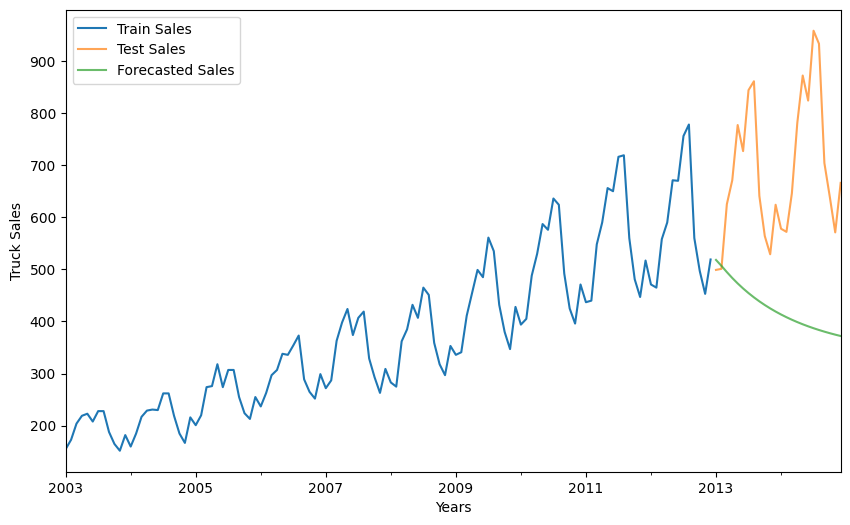

In [43]:
axis = train['Truck-Sales'].plot(label='Train Sales', figsize=(10, 6))
testCopy1['Truck-Sales'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy1['sales_ts_forecasted'].plot(ax=axis, label='Forecasted Sales', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Truck Sales')
plt.legend(loc='best')
plt.show()
plt.close()

In [44]:
resultsDf = pd.DataFrame({'RMSE': rmse}
                           ,index=['Best AR Model : ARIMA(2,0,0)'])

resultsDf

,RMSE
"Best AR Model : ARIMA(2,0,0)",306.142152


**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## ARMA Model



- **Improving AutoRegressive Models through Moving Average Forecasts.**
- ARMA models consist of 2 components:-
	- **AR model: <font color='blue'>The data is modeled based on past observations.</font>**
	- **MA model: <font color='blue'>Previous forecast errors are incorporated into the model.</font>**

#### <u>ARMA Model building to estimate best <font color='blue'>'p' , 'q' </font> ( Lowest AIC Approach )</u>

In [45]:
# Creating an empty Dataframe with column names only
ARMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARMA_AIC

,param,AIC


In [46]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq_arma:
    ARIMA_model = ARIMA(train_sales_ts_log,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARMA_AIC =ARMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(1, 0, 1) - AIC:-346.44125864638977
ARIMA(1, 0, 2) - AIC:-344.49993869058653


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 3) - AIC:-354.4418028296453
ARIMA(2, 0, 1) - AIC:-344.48549730443216
ARIMA(2, 0, 2) - AIC:-347.2827213667326


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 3) - AIC:-352.8777881096966


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 0, 1) - AIC:-346.4660684734122


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 0, 2) - AIC:-345.3211638440407
ARIMA(3, 0, 3) - AIC:-385.7443842767009


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [47]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
8,"(3, 0, 3)",-385.744384
2,"(1, 0, 3)",-354.441803
5,"(2, 0, 3)",-352.877788
4,"(2, 0, 2)",-347.282721
6,"(3, 0, 1)",-346.466068


#### <u>Building ARMA model with best p,q parameter </u>

In [48]:
best_model = ARIMA(train_sales_ts_log,order = (3,0,3))
best_results = best_model.fit()

C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [49]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:            Truck-Sales   No. Observations:                  120
Model:                 ARIMA(3, 0, 3)   Log Likelihood                 200.872
Date:                Fri, 24 Feb 2023   AIC                           -385.744
Time:                        13:06:48   BIC                           -363.444
Sample:                    01-01-2003   HQIC                          -376.688
                         - 12-01-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4990      0.901      2.772      0.006       0.732       4.266
ar.L1         -0.7266      0.024    -29.748      0.000      -0.775      -0.679
ar.L2          0.7157      0.038     18.679      0.0

#### <u>Calculating RMSE for best MA model </u>

In [50]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('2012-01-01'), dynamic=True, full_results=True)

In [51]:
pred99 = best_results.get_forecast(steps=len(test), alpha=0.1)#forecasting values 

In [52]:
# Extract the predicted and true values of our time series
sales_ts_forecasted = pred_dynamic.predicted_mean
testCopy1 = test.copy()
testCopy1['sales_ts_forecasted'] = np.power(10, pred99.predicted_mean)

In [53]:
# Compute the root mean square error
mse = ((testCopy1['Truck-Sales'] - testCopy1['sales_ts_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 231.408


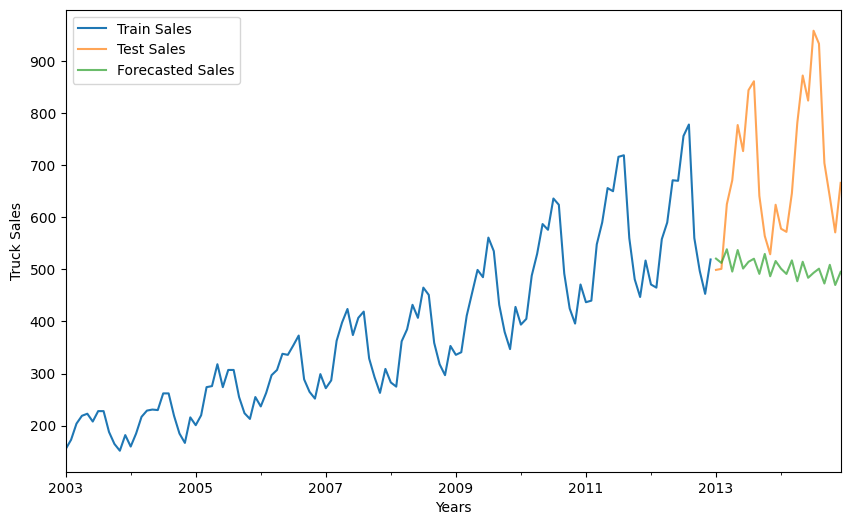

In [54]:
axis = train['Truck-Sales'].plot(label='Train Sales', figsize=(10, 6))
testCopy1['Truck-Sales'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy1['sales_ts_forecasted'].plot(ax=axis, label='Forecasted Sales', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Truck Sales')
plt.legend(loc='best')
plt.show()
plt.close()

In [55]:
resultsDf1 = pd.DataFrame({'RMSE': rmse}
                           ,index=['Best ARMA Model : ARIMA(3,0,3)'])

resultsDf1

pd.concat([resultsDf,resultsDf1])

,RMSE
"Best AR Model : ARIMA(2,0,0)",306.142152
"Best ARMA Model : ARIMA(3,0,3)",231.408333


**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## ARIMA Model

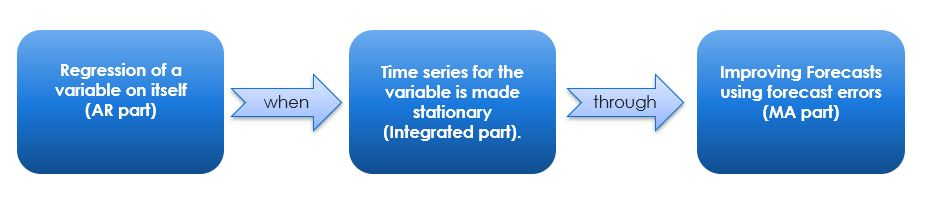

- ARIMA:- **Auto Regressive Integrated Moving Average** is a way of modeling time series data **for forecasting or predicting future data points**. 
- **Improving AR Models by making Time Series stationary through Moving AVerage Forecasts** 


- ARIMA models consist of 3 components:-
	- **AR model: <font color='blue'>The data is modeled based on past observations.</font>**
	- **Integrated component: <font color='blue'>Whether the data needs to be differenced/transformed.</font>**
	- **MA model: <font color='blue'>Previous forecast errors are incorporated into the model.</font>**

#### <u>ARIMA Model building to estimate best <font color='blue'>'p' , 'd' , 'q' </font> paramters ( Lowest AIC Approach )</u>

In [56]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [57]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train_sales_ts_log,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(1, 0, 1) - AIC:-346.44125864638977
ARIMA(1, 0, 2) - AIC:-344.49993869058653


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 3) - AIC:-354.4418028296453
ARIMA(1, 1, 1) - AIC:-345.29068676459843
ARIMA(1, 1, 2) - AIC:-343.30244747008936
ARIMA(1, 1, 3) - AIC:-357.34927889306783
ARIMA(2, 0, 1) - AIC:-344.48549730443216
ARIMA(2, 0, 2) - AIC:-347.2827213667326


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 3) - AIC:-352.8777881096966
ARIMA(2, 1, 1) - AIC:-353.3706463565172


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2) - AIC:-372.95139076616863
ARIMA(2, 1, 3) - AIC:-355.411392342407


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 0, 1) - AIC:-346.4660684734122


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 0, 2) - AIC:-345.3211638440407


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 0, 3) - AIC:-385.7443842767009
ARIMA(3, 1, 1) - AIC:-354.4194536162819


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 1, 2) - AIC:-377.1182960365723
ARIMA(3, 1, 3) - AIC:-373.0877006457598


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [58]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
14,"(3, 0, 3)",-385.744384
16,"(3, 1, 2)",-377.118296
17,"(3, 1, 3)",-373.087701
10,"(2, 1, 2)",-372.951391
5,"(1, 1, 3)",-357.349279


#### <u>Building ARIMA model with best parameters p,d,q</u>

In [59]:

best_model = ARIMA(train_sales_ts_log,order = (3,0,3))
best_results = best_model.fit()

C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [60]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:            Truck-Sales   No. Observations:                  120
Model:                 ARIMA(3, 0, 3)   Log Likelihood                 200.872
Date:                Fri, 24 Feb 2023   AIC                           -385.744
Time:                        13:06:52   BIC                           -363.444
Sample:                    01-01-2003   HQIC                          -376.688
                         - 12-01-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4990      0.901      2.772      0.006       0.732       4.266
ar.L1         -0.7266      0.024    -29.748      0.000      -0.775      -0.679
ar.L2          0.7157      0.038     18.679      0.0

#### <u>Calculating RMSE for best ARIMA model </u>

In [61]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('2012-01-01'), dynamic=True, full_results=True)

In [62]:
pred99 = best_results.get_forecast(steps=len(test), alpha=0.1)#forecasting values 

In [63]:
# Extract the predicted and true values of our time series
sales_ts_forecasted = pred_dynamic.predicted_mean
testCopy1 = test.copy()
testCopy1['sales_ts_forecasted'] = np.power(10, pred99.predicted_mean)

In [64]:
# Compute the root mean square error
mse = ((testCopy1['Truck-Sales'] - testCopy1['sales_ts_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 231.408


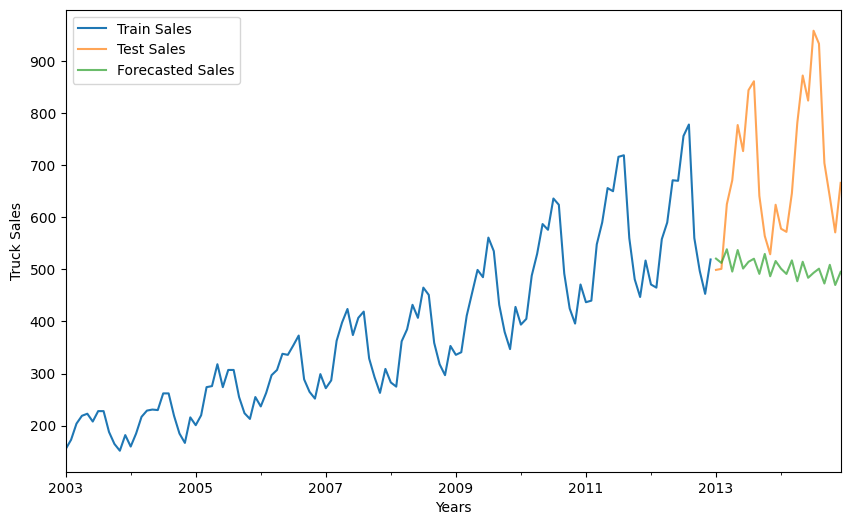

In [65]:
axis = train['Truck-Sales'].plot(label='Train Sales', figsize=(10, 6))
testCopy1['Truck-Sales'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy1['sales_ts_forecasted'].plot(ax=axis, label='Forecasted Sales', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Truck Sales')
plt.legend(loc='best')
plt.show()
plt.close()

In [66]:
resultsDf2 = pd.DataFrame({'RMSE': rmse}
                           ,index=['Best ARIMA Model : ARIMA(3,0,3)'])

resultsDf2

pd.concat([resultsDf,resultsDf1,resultsDf2])

,RMSE
"Best AR Model : ARIMA(2,0,0)",306.142152
"Best ARMA Model : ARIMA(3,0,3)",231.408333
"Best ARIMA Model : ARIMA(3,0,3)",231.408333


 **---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

 **---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## SARIMA Model 

- **The ARIMA models can be extended/improved to handle seasonal components of a data series.**



- The seasonal autoregressive moving average model is given by
    -                   <b>SARIMA (p, d, q)(P, D, Q)F </b>
    
    

- The above model consists of:
	- <font color='blue'>Autoregressive and moving average components (p, q)</font>
	- <font color='blue'>Seasonal autoregressive and moving average components (P, Q) </font>
	- <font color='blue'>The ordinary and seasonal difference components of order ‘d’ and ‘D’ </font>
	- <font color='blue'>Seasonal frequency ‘F’</font>
    

- The value for the parameters (p,d,q) and (P, D, Q) can be decided by comparing different values for each and taking **the lowest   AIC value** for the model build.


- **The value for F can be consolidated by ACF plot**








#### <u>Finding Seasonality = 12 from ACF/PACF plots </u> 

In [67]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

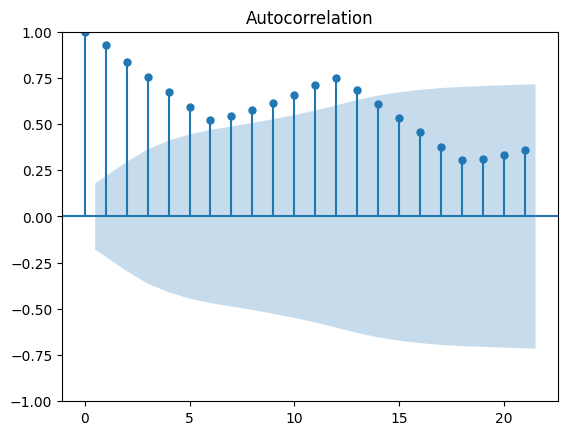

In [68]:
plot_acf(train['Truck-Sales'],alpha=0.05);

#### <u>SARIMA Model building to estimate best parameters </u>

In [69]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

In [70]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [71]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in seasonal_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train_sales_ts_log,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(1, 0, 1)x(1, 0, 1, 12) - AIC:-559.2780503911803
SARIMA(1, 0, 1)x(1, 0, 2, 12) - AIC:-490.12612791204907


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 1)x(1, 0, 3, 12) - AIC:2248.219106262915
SARIMA(1, 0, 1)x(1, 1, 1, 12) - AIC:-493.87859234230245
SARIMA(1, 0, 1)x(1, 1, 2, 12) - AIC:-437.5621487576198
SARIMA(1, 0, 1)x(1, 1, 3, 12) - AIC:-382.5229324694493
SARIMA(1, 0, 1)x(2, 0, 1, 12) - AIC:-497.4744043808232
SARIMA(1, 0, 1)x(2, 0, 2, 12) - AIC:-501.72287616181177


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 1)x(2, 0, 3, 12) - AIC:2244.122707910329
SARIMA(1, 0, 1)x(2, 1, 1, 12) - AIC:-445.1666137603484
SARIMA(1, 0, 1)x(2, 1, 2, 12) - AIC:-431.8460656796175


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 1)x(2, 1, 3, 12) - AIC:-359.9389578554437
SARIMA(1, 0, 1)x(3, 0, 1, 12) - AIC:-443.3677481433442
SARIMA(1, 0, 1)x(3, 0, 2, 12) - AIC:-444.31665341329864


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 1)x(3, 0, 3, 12) - AIC:1975.3351937158116
SARIMA(1, 0, 1)x(3, 1, 1, 12) - AIC:-396.6774161679495
SARIMA(1, 0, 1)x(3, 1, 2, 12) - AIC:-364.2478163770045
SARIMA(1, 0, 1)x(3, 1, 3, 12) - AIC:-390.1341886061857
SARIMA(1, 0, 2)x(1, 0, 1, 12) - AIC:-550.9708786800686
SARIMA(1, 0, 2)x(1, 0, 2, 12) - AIC:-483.30498679655216


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 2)x(1, 0, 3, 12) - AIC:2455.585307147891
SARIMA(1, 0, 2)x(1, 1, 1, 12) - AIC:-486.9965806446315
SARIMA(1, 0, 2)x(1, 1, 2, 12) - AIC:-433.0461755563335
SARIMA(1, 0, 2)x(1, 1, 3, 12) - AIC:-377.4802548267535
SARIMA(1, 0, 2)x(2, 0, 1, 12) - AIC:-495.4744195507418
SARIMA(1, 0, 2)x(2, 0, 2, 12) - AIC:-496.7962851951904


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 2)x(2, 0, 3, 12) - AIC:2451.56479973887
SARIMA(1, 0, 2)x(2, 1, 1, 12) - AIC:-443.4269144234915
SARIMA(1, 0, 2)x(2, 1, 2, 12) - AIC:-423.0382662742091
SARIMA(1, 0, 2)x(2, 1, 3, 12) - AIC:-376.3170562530593
SARIMA(1, 0, 2)x(3, 0, 1, 12) - AIC:-441.1322049339814
SARIMA(1, 0, 2)x(3, 0, 2, 12) - AIC:-442.32198967052926


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 2)x(3, 0, 3, 12) - AIC:2186.00851209157
SARIMA(1, 0, 2)x(3, 1, 1, 12) - AIC:-395.34673741084526
SARIMA(1, 0, 2)x(3, 1, 2, 12) - AIC:-393.31248356462845


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 2)x(3, 1, 3, 12) - AIC:-385.1248445606333
SARIMA(1, 0, 3)x(1, 0, 1, 12) - AIC:-545.6908868772491
SARIMA(1, 0, 3)x(1, 0, 2, 12) - AIC:-478.8646623085022


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 3)x(1, 0, 3, 12) - AIC:2192.3584135235196
SARIMA(1, 0, 3)x(1, 1, 1, 12) - AIC:-483.0458899847839


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 3)x(1, 1, 2, 12) - AIC:-423.54234741683706
SARIMA(1, 0, 3)x(1, 1, 3, 12) - AIC:-375.82163991856663
SARIMA(1, 0, 3)x(2, 0, 1, 12) - AIC:-496.9334863352742


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 3)x(2, 0, 2, 12) - AIC:-491.0844969218185


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 3)x(2, 0, 3, 12) - AIC:2188.4103651935493
SARIMA(1, 0, 3)x(2, 1, 1, 12) - AIC:-442.90014971607144
SARIMA(1, 0, 3)x(2, 1, 2, 12) - AIC:-420.3152126998522
SARIMA(1, 0, 3)x(2, 1, 3, 12) - AIC:-374.37708393489555
SARIMA(1, 0, 3)x(3, 0, 1, 12) - AIC:-441.5986103916784
SARIMA(1, 0, 3)x(3, 0, 2, 12) - AIC:-442.0599909305753


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 3)x(3, 0, 3, 12) - AIC:1926.2553037130967
SARIMA(1, 0, 3)x(3, 1, 1, 12) - AIC:-395.3773161761592
SARIMA(1, 0, 3)x(3, 1, 2, 12) - AIC:-376.49336450702896
SARIMA(1, 0, 3)x(3, 1, 3, 12) - AIC:-358.16691712325394
SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:-551.1522476426672
SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:-482.12874451113


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(1, 0, 3, 12) - AIC:2328.785262225756
SARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:-486.99599214375775
SARIMA(1, 1, 1)x(1, 1, 2, 12) - AIC:-439.24464535944674


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(1, 1, 3, 12) - AIC:-380.3479937801419
SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:-490.1226411411909


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:-495.70916564051925


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(2, 0, 3, 12) - AIC:2559.8969548363334
SARIMA(1, 1, 1)x(2, 1, 1, 12) - AIC:-435.93874601036197
SARIMA(1, 1, 1)x(2, 1, 2, 12) - AIC:-433.9917191849979
SARIMA(1, 1, 1)x(2, 1, 3, 12) - AIC:-377.5524794509998
SARIMA(1, 1, 1)x(3, 0, 1, 12) - AIC:-437.1330614208458
SARIMA(1, 1, 1)x(3, 0, 2, 12) - AIC:-438.2688501920128


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(3, 0, 3, 12) - AIC:2495.376018626687
SARIMA(1, 1, 1)x(3, 1, 1, 12) - AIC:-391.25505833906266
SARIMA(1, 1, 1)x(3, 1, 2, 12) - AIC:-391.90916196433255
SARIMA(1, 1, 1)x(3, 1, 3, 12) - AIC:-384.2370133868866
SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:-544.2801579939041
SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:-475.5944189850081


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 0, 3, 12) - AIC:16.0
SARIMA(1, 1, 2)x(1, 1, 1, 12) - AIC:-483.72003084467207
SARIMA(1, 1, 2)x(1, 1, 2, 12) - AIC:-430.8951887882996
SARIMA(1, 1, 2)x(1, 1, 3, 12) - AIC:-375.2680750377075
SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:-487.0021136940095
SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:-490.26793890041046


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:18.0
SARIMA(1, 1, 2)x(2, 1, 1, 12) - AIC:-436.05103031806703
SARIMA(1, 1, 2)x(2, 1, 2, 12) - AIC:-426.10352410862725
SARIMA(1, 1, 2)x(2, 1, 3, 12) - AIC:-373.37692429261136
SARIMA(1, 1, 2)x(3, 0, 1, 12) - AIC:-435.211129994209
SARIMA(1, 1, 2)x(3, 0, 2, 12) - AIC:-433.97456021270136


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 0, 3, 12) - AIC:20.0
SARIMA(1, 1, 2)x(3, 1, 1, 12) - AIC:-389.4850447466786


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 1, 2, 12) - AIC:-390.40979099446514
SARIMA(1, 1, 2)x(3, 1, 3, 12) - AIC:-380.4043027521771
SARIMA(1, 1, 3)x(1, 0, 1, 12) - AIC:-538.6171148908596
SARIMA(1, 1, 3)x(1, 0, 2, 12) - AIC:-477.43546903945315
SARIMA(1, 1, 3)x(1, 0, 3, 12) - AIC:2385.144962653346
SARIMA(1, 1, 3)x(1, 1, 1, 12) - AIC:-482.8881558162489
SARIMA(1, 1, 3)x(1, 1, 2, 12) - AIC:-425.592591480521
SARIMA(1, 1, 3)x(1, 1, 3, 12) - AIC:-349.127076844192
SARIMA(1, 1, 3)x(2, 0, 1, 12) - AIC:-489.3392964530701
SARIMA(1, 1, 3)x(2, 0, 2, 12) - AIC:-491.2284024780135
SARIMA(1, 1, 3)x(2, 0, 3, 12) - AIC:2610.6002564515347
SARIMA(1, 1, 3)x(2, 1, 1, 12) - AIC:-435.07290007885047
SARIMA(1, 1, 3)x(2, 1, 2, 12) - AIC:-421.18169865737923
SARIMA(1, 1, 3)x(2, 1, 3, 12) - AIC:-365.81308625103037
SARIMA(1, 1, 3)x(3, 0, 1, 12) - AIC:-432.9700023001383
SARIMA(1, 1, 3)x(3, 0, 2, 12) - AIC:-435.4953016764256
SARIMA(1, 1, 3)x(3, 0, 3, 12) - AIC:2547.7216125943287
SARIMA(1, 1, 3)x(3, 1, 1, 12) - AIC:-389.4312411170486
SARIMA(1

C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(3, 1, 3, 12) - AIC:-374.81275597601024
SARIMA(2, 0, 1)x(1, 0, 1, 12) - AIC:-557.9488584117671
SARIMA(2, 0, 1)x(1, 0, 2, 12) - AIC:-489.57713261270845


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 1)x(1, 0, 3, 12) - AIC:2209.010877095205
SARIMA(2, 0, 1)x(1, 1, 1, 12) - AIC:-491.3645999341591
SARIMA(2, 0, 1)x(1, 1, 2, 12) - AIC:-433.50006362325917
SARIMA(2, 0, 1)x(1, 1, 3, 12) - AIC:-381.61955008859843
SARIMA(2, 0, 1)x(2, 0, 1, 12) - AIC:-490.3813790012542
SARIMA(2, 0, 1)x(2, 0, 2, 12) - AIC:-499.21686555664314


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 1)x(2, 0, 3, 12) - AIC:2204.9121080219343
SARIMA(2, 0, 1)x(2, 1, 1, 12) - AIC:-437.4541849914837
SARIMA(2, 0, 1)x(2, 1, 2, 12) - AIC:-426.68252404569097
SARIMA(2, 0, 1)x(2, 1, 3, 12) - AIC:-378.6783954594699
SARIMA(2, 0, 1)x(3, 0, 1, 12) - AIC:-435.5706195726732
SARIMA(2, 0, 1)x(3, 0, 2, 12) - AIC:-436.50720170629734


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 1)x(3, 0, 3, 12) - AIC:1936.1867739655465
SARIMA(2, 0, 1)x(3, 1, 1, 12) - AIC:-390.92408931065563
SARIMA(2, 0, 1)x(3, 1, 2, 12) - AIC:-358.4547389290043
SARIMA(2, 0, 1)x(3, 1, 3, 12) - AIC:-387.08947548055085
SARIMA(2, 0, 2)x(1, 0, 1, 12) - AIC:-551.4723015970114
SARIMA(2, 0, 2)x(1, 0, 2, 12) - AIC:-481.2347273353152
SARIMA(2, 0, 2)x(1, 0, 3, 12) - AIC:2416.6352217557446
SARIMA(2, 0, 2)x(1, 1, 1, 12) - AIC:-488.93060456825896
SARIMA(2, 0, 2)x(1, 1, 2, 12) - AIC:-430.8364366333629


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 2)x(1, 1, 3, 12) - AIC:-375.6919348069951
SARIMA(2, 0, 2)x(2, 0, 1, 12) - AIC:-487.9982839095995
SARIMA(2, 0, 2)x(2, 0, 2, 12) - AIC:-494.7125252387093
SARIMA(2, 0, 2)x(2, 0, 3, 12) - AIC:2412.614927953621
SARIMA(2, 0, 2)x(2, 1, 1, 12) - AIC:-435.130936781042
SARIMA(2, 0, 2)x(2, 1, 2, 12) - AIC:-426.23795570696126


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 2)x(2, 1, 3, 12) - AIC:-378.24975115238703
SARIMA(2, 0, 2)x(3, 0, 1, 12) - AIC:-433.95329804834734
SARIMA(2, 0, 2)x(3, 0, 2, 12) - AIC:-435.0383640589722


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 2)x(3, 0, 3, 12) - AIC:2147.0596272391062


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 2)x(3, 1, 1, 12) - AIC:-389.01640785223464
SARIMA(2, 0, 2)x(3, 1, 2, 12) - AIC:-378.95334163538706
SARIMA(2, 0, 2)x(3, 1, 3, 12) - AIC:-381.2342831421123
SARIMA(2, 0, 3)x(1, 0, 1, 12) - AIC:-521.3826546915385


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 3)x(1, 0, 2, 12) - AIC:-408.3893351330974


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 3)x(1, 0, 3, 12) - AIC:20.0


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 3)x(1, 1, 1, 12) - AIC:-481.1304591948951
SARIMA(2, 0, 3)x(1, 1, 2, 12) - AIC:-420.76158942552206
SARIMA(2, 0, 3)x(1, 1, 3, 12) - AIC:-373.7816683530463
SARIMA(2, 0, 3)x(2, 0, 1, 12) - AIC:-473.5820126612321
SARIMA(2, 0, 3)x(2, 0, 2, 12) - AIC:-477.3939010178687
SARIMA(2, 0, 3)x(2, 0, 3, 12) - AIC:22.0
SARIMA(2, 0, 3)x(2, 1, 1, 12) - AIC:-434.7109891121556
SARIMA(2, 0, 3)x(2, 1, 2, 12) - AIC:-420.14286032493396
SARIMA(2, 0, 3)x(2, 1, 3, 12) - AIC:-372.29648316168374
SARIMA(2, 0, 3)x(3, 0, 1, 12) - AIC:-424.84843640847987
SARIMA(2, 0, 3)x(3, 0, 2, 12) - AIC:-419.0282504204909
SARIMA(2, 0, 3)x(3, 0, 3, 12) - AIC:1949.7030837006791
SARIMA(2, 0, 3)x(3, 1, 1, 12) - AIC:-387.97670429016586
SARIMA(2, 0, 3)x(3, 1, 2, 12) - AIC:-385.5771521521909
SARIMA(2, 0, 3)x(3, 1, 3, 12) - AIC:-356.4460664013336
SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:-550.8130264458524
SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:-480.99924185428046


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:2095.0233737371323


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(1, 1, 1, 12) - AIC:192.2609958060754
SARIMA(2, 1, 1)x(1, 1, 2, 12) - AIC:182.87086155831372
SARIMA(2, 1, 1)x(1, 1, 3, 12) - AIC:128.9801119254858
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:-484.9065429884951
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:-494.8119040477167
SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:2409.2333658882885


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(2, 1, 1, 12) - AIC:159.68744254655272


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(2, 1, 2, 12) - AIC:163.90591285683476
SARIMA(2, 1, 1)x(2, 1, 3, 12) - AIC:129.65514239753793
SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:-431.5707404124468
SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:-428.4354960543133


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:364.2552513216236
SARIMA(2, 1, 1)x(3, 1, 1, 12) - AIC:120.80422652419784


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(3, 1, 2, 12) - AIC:119.2950278448088
SARIMA(2, 1, 1)x(3, 1, 3, 12) - AIC:132.79862011424072
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:-542.6692494397049
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:-473.33817953755573
SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:18.0
SARIMA(2, 1, 2)x(1, 1, 1, 12) - AIC:-484.2180544633478


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 1, 2, 12) - AIC:-429.68624947196747
SARIMA(2, 1, 2)x(1, 1, 3, 12) - AIC:-372.45764121436656
SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:-486.4592773588789
SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:-486.2115931112502


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 0, 3, 12) - AIC:20.0
SARIMA(2, 1, 2)x(2, 1, 1, 12) - AIC:-431.16946774488844
SARIMA(2, 1, 2)x(2, 1, 2, 12) - AIC:-425.40513613424
SARIMA(2, 1, 2)x(2, 1, 3, 12) - AIC:-375.04484327413627
SARIMA(2, 1, 2)x(3, 0, 1, 12) - AIC:-428.95000067746287
SARIMA(2, 1, 2)x(3, 0, 2, 12) - AIC:-430.1253358553452


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(3, 0, 3, 12) - AIC:22.0
SARIMA(2, 1, 2)x(3, 1, 1, 12) - AIC:-381.831313416213
SARIMA(2, 1, 2)x(3, 1, 2, 12) - AIC:-390.0987567382729
SARIMA(2, 1, 2)x(3, 1, 3, 12) - AIC:-375.9821560442503
SARIMA(2, 1, 3)x(1, 0, 1, 12) - AIC:-536.1120567553901
SARIMA(2, 1, 3)x(1, 0, 2, 12) - AIC:-479.9790928501023


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(1, 0, 3, 12) - AIC:2090.300941265902
SARIMA(2, 1, 3)x(1, 1, 1, 12) - AIC:-488.17864759158584
SARIMA(2, 1, 3)x(1, 1, 2, 12) - AIC:-430.9651157398285
SARIMA(2, 1, 3)x(1, 1, 3, 12) - AIC:-370.8688838673113
SARIMA(2, 1, 3)x(2, 0, 1, 12) - AIC:-488.04267802286364
SARIMA(2, 1, 3)x(2, 0, 2, 12) - AIC:-497.9233860614048


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(2, 0, 3, 12) - AIC:2315.752493057224
SARIMA(2, 1, 3)x(2, 1, 1, 12) - AIC:-449.24011172760976
SARIMA(2, 1, 3)x(2, 1, 2, 12) - AIC:-435.4336452846157
SARIMA(2, 1, 3)x(2, 1, 3, 12) - AIC:-367.42139637100934
SARIMA(2, 1, 3)x(3, 0, 1, 12) - AIC:-428.1478471714214
SARIMA(2, 1, 3)x(3, 0, 2, 12) - AIC:-445.5613572596879


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(3, 0, 3, 12) - AIC:2252.8752339484417
SARIMA(2, 1, 3)x(3, 1, 1, 12) - AIC:-403.4181438456734
SARIMA(2, 1, 3)x(3, 1, 2, 12) - AIC:-388.3532678011199
SARIMA(2, 1, 3)x(3, 1, 3, 12) - AIC:-374.0198311448741
SARIMA(3, 0, 1)x(1, 0, 1, 12) - AIC:-549.6834766886653
SARIMA(3, 0, 1)x(1, 0, 2, 12) - AIC:-487.6976569263268


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 1)x(1, 0, 3, 12) - AIC:2211.0128556481577
SARIMA(3, 0, 1)x(1, 1, 1, 12) - AIC:-484.62099129322


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 1)x(1, 1, 2, 12) - AIC:-433.3330302057225
SARIMA(3, 0, 1)x(1, 1, 3, 12) - AIC:-377.9774777134267
SARIMA(3, 0, 1)x(2, 0, 1, 12) - AIC:-488.7307350514614
SARIMA(3, 0, 1)x(2, 0, 2, 12) - AIC:-493.19779314877627


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 1)x(2, 0, 3, 12) - AIC:2206.914502376842
SARIMA(3, 0, 1)x(2, 1, 1, 12) - AIC:-430.91097887714363
SARIMA(3, 0, 1)x(2, 1, 2, 12) - AIC:-422.662042440652
SARIMA(3, 0, 1)x(2, 1, 3, 12) - AIC:-374.93028610919725
SARIMA(3, 0, 1)x(3, 0, 1, 12) - AIC:-429.7311019068009
SARIMA(3, 0, 1)x(3, 0, 2, 12) - AIC:-430.6947757670108


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 1)x(3, 0, 3, 12) - AIC:1914.835459887321
SARIMA(3, 0, 1)x(3, 1, 1, 12) - AIC:-383.93602263345974
SARIMA(3, 0, 1)x(3, 1, 2, 12) - AIC:-372.3328066293197
SARIMA(3, 0, 1)x(3, 1, 3, 12) - AIC:-380.3834264687921
SARIMA(3, 0, 2)x(1, 0, 1, 12) - AIC:-549.7094752028598
SARIMA(3, 0, 2)x(1, 0, 2, 12) - AIC:-428.6224298663548


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 2)x(1, 0, 3, 12) - AIC:2416.6258556857238
SARIMA(3, 0, 2)x(1, 1, 1, 12) - AIC:-489.5252598033189


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 2)x(1, 1, 2, 12) - AIC:-419.07079779110086
SARIMA(3, 0, 2)x(1, 1, 3, 12) - AIC:-373.4680493119177
SARIMA(3, 0, 2)x(2, 0, 1, 12) - AIC:-481.0594940472148
SARIMA(3, 0, 2)x(2, 0, 2, 12) - AIC:-493.3138354866734
SARIMA(3, 0, 2)x(2, 0, 3, 12) - AIC:2412.603975649103
SARIMA(3, 0, 2)x(2, 1, 1, 12) - AIC:-421.6683479332903
SARIMA(3, 0, 2)x(2, 1, 2, 12) - AIC:-422.1566470345075


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 2)x(2, 1, 3, 12) - AIC:-373.91724577899896
SARIMA(3, 0, 2)x(3, 0, 1, 12) - AIC:-423.0160492231256
SARIMA(3, 0, 2)x(3, 0, 2, 12) - AIC:-427.05767779558147
SARIMA(3, 0, 2)x(3, 0, 3, 12) - AIC:2147.046222126847
SARIMA(3, 0, 2)x(3, 1, 1, 12) - AIC:-379.99005515338155
SARIMA(3, 0, 2)x(3, 1, 2, 12) - AIC:-372.9987131483994
SARIMA(3, 0, 2)x(3, 1, 3, 12) - AIC:-366.60531873676837
SARIMA(3, 0, 3)x(1, 0, 1, 12) - AIC:-526.753474695855
SARIMA(3, 0, 3)x(1, 0, 2, 12) - AIC:-223.51338281880854


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 3)x(1, 0, 3, 12) - AIC:22.0
SARIMA(3, 0, 3)x(1, 1, 1, 12) - AIC:-482.8276071711082
SARIMA(3, 0, 3)x(1, 1, 2, 12) - AIC:-416.9692971489462
SARIMA(3, 0, 3)x(1, 1, 3, 12) - AIC:-372.5923538416534


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 3)x(2, 0, 1, 12) - AIC:-477.22635469797945


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 3)x(2, 0, 2, 12) - AIC:-477.7016044011315


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 3)x(2, 0, 3, 12) - AIC:2725.774448334356
SARIMA(3, 0, 3)x(2, 1, 1, 12) - AIC:-430.77391867708974
SARIMA(3, 0, 3)x(2, 1, 2, 12) - AIC:-416.4926547975206


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 3)x(2, 1, 3, 12) - AIC:-370.753231040702
SARIMA(3, 0, 3)x(3, 0, 1, 12) - AIC:-427.46905072507445
SARIMA(3, 0, 3)x(3, 0, 2, 12) - AIC:-419.6162839341656


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 3)x(3, 0, 3, 12) - AIC:2472.4549336590862
SARIMA(3, 0, 3)x(3, 1, 1, 12) - AIC:-384.59251472531867
SARIMA(3, 0, 3)x(3, 1, 2, 12) - AIC:-390.02544328049333


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 3)x(3, 1, 3, 12) - AIC:-379.5776846109192


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(1, 0, 1, 12) - AIC:-543.3929438627422
SARIMA(3, 1, 1)x(1, 0, 2, 12) - AIC:-481.4635487981319


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(1, 0, 3, 12) - AIC:2434.683407968973
SARIMA(3, 1, 1)x(1, 1, 1, 12) - AIC:-482.2415879033948


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(1, 1, 2, 12) - AIC:-436.7292551467003
SARIMA(3, 1, 1)x(1, 1, 3, 12) - AIC:-376.06216475665457
SARIMA(3, 1, 1)x(2, 0, 1, 12) - AIC:-475.52295362851


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(2, 0, 2, 12) - AIC:-488.0980046605732


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(2, 0, 3, 12) - AIC:2665.795809063443
SARIMA(3, 1, 1)x(2, 1, 1, 12) - AIC:-426.33267896101677
SARIMA(3, 1, 1)x(2, 1, 2, 12) - AIC:-425.9359816956566
SARIMA(3, 1, 1)x(2, 1, 3, 12) - AIC:-373.447352420499
SARIMA(3, 1, 1)x(3, 0, 1, 12) - AIC:-424.44502976094975
SARIMA(3, 1, 1)x(3, 0, 2, 12) - AIC:-423.92339418288884


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(3, 0, 3, 12) - AIC:2569.431778183376
SARIMA(3, 1, 1)x(3, 1, 1, 12) - AIC:-380.0465832933492
SARIMA(3, 1, 1)x(3, 1, 2, 12) - AIC:-382.2105865792749


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(3, 1, 3, 12) - AIC:-373.9959155812153
SARIMA(3, 1, 2)x(1, 0, 1, 12) - AIC:-317.85711799684833


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(1, 0, 2, 12) - AIC:-369.6590596545173
SARIMA(3, 1, 2)x(1, 0, 3, 12) - AIC:2859.0787355172442
SARIMA(3, 1, 2)x(1, 1, 1, 12) - AIC:-482.18636140263186


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(1, 1, 2, 12) - AIC:-439.33982374068523
SARIMA(3, 1, 2)x(1, 1, 3, 12) - AIC:-378.3159196000235


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(2, 0, 1, 12) - AIC:15.489802946730535
SARIMA(3, 1, 2)x(2, 0, 2, 12) - AIC:-213.42945920036726


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(2, 0, 3, 12) - AIC:3002.152502610926


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(2, 1, 1, 12) - AIC:-444.3014410766257
SARIMA(3, 1, 2)x(2, 1, 2, 12) - AIC:-442.4010716877405
SARIMA(3, 1, 2)x(2, 1, 3, 12) - AIC:-384.8400449178171


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(3, 0, 1, 12) - AIC:-145.23601709905964
SARIMA(3, 1, 2)x(3, 0, 2, 12) - AIC:-51.24819243072632


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(3, 0, 3, 12) - AIC:24.0
SARIMA(3, 1, 2)x(3, 1, 1, 12) - AIC:-397.2822020752414
SARIMA(3, 1, 2)x(3, 1, 2, 12) - AIC:-369.0079327803896
SARIMA(3, 1, 2)x(3, 1, 3, 12) - AIC:-387.801423569418
SARIMA(3, 1, 3)x(1, 0, 1, 12) - AIC:-536.1400481219638
SARIMA(3, 1, 3)x(1, 0, 2, 12) - AIC:-478.03104865758837
SARIMA(3, 1, 3)x(1, 0, 3, 12) - AIC:605.9109061855836
SARIMA(3, 1, 3)x(1, 1, 1, 12) - AIC:-487.99716866348234


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(1, 1, 2, 12) - AIC:-429.25812316549485
SARIMA(3, 1, 3)x(1, 1, 3, 12) - AIC:-375.0776372154957
SARIMA(3, 1, 3)x(2, 0, 1, 12) - AIC:-479.5803953992038
SARIMA(3, 1, 3)x(2, 0, 2, 12) - AIC:-496.13250586697643


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(2, 0, 3, 12) - AIC:940.8480040225629
SARIMA(3, 1, 3)x(2, 1, 1, 12) - AIC:-442.5665348168926


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(2, 1, 2, 12) - AIC:-434.2927317175849
SARIMA(3, 1, 3)x(2, 1, 3, 12) - AIC:-371.13489490176914


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(3, 0, 1, 12) - AIC:-439.72616378618955
SARIMA(3, 1, 3)x(3, 0, 2, 12) - AIC:-421.55782301234


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(3, 0, 3, 12) - AIC:847.3474477141885
SARIMA(3, 1, 3)x(3, 1, 1, 12) - AIC:-395.5663990144593


C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(3, 1, 2, 12) - AIC:-369.6564358756423
SARIMA(3, 1, 3)x(3, 1, 3, 12) - AIC:-385.106038690417


In [72]:
SARIMA_AIC.sort_values(by=['AIC'],ascending=True).head()

,param,seasonal,AIC
0,"(1, 0, 1)","(1, 0, 1, 12)",-559.278050
108,"(2, 0, 1)","(1, 0, 1, 12)",-557.948858
126,"(2, 0, 2)","(1, 0, 1, 12)",-551.472302
54,"(1, 1, 1)","(1, 0, 1, 12)",-551.152248
18,"(1, 0, 2)","(1, 0, 1, 12)",-550.970879


#### Inference

* Criteria to choose the best fit model is the lowest/minimum AIC value 

For ARIMA(p, d, q) × (P, D, Q)S,
we got SARIMAX(1, 0, 1)x(1, 0, 1, 12)model with the least AIC of -559.278050

Here, 
* p = non-seasonal AR order = 1,
* d = non-seasonal differencing = 0,
* q = non-seasonal MA order = 1,
* P = seasonal AR order = 1,
* D = seasonal differencing = 0,
* Q = seasonal MA order = 1,
* S = time span of repeating seasonal pattern = 12


#### <u>Building SARIMA model with the best parameters </u>


In [73]:
best_model = sm.tsa.statespace.SARIMAX(train_sales_ts_log,
                                      order=(1, 0, 1),
                                      seasonal_order=(1, 0, 1, 12),
                                      enforce_stationarity=True)
best_results = best_model.fit()

In [74]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                                     SARIMAX Results                                      
Dep. Variable:                        Truck-Sales   No. Observations:                  120
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                 302.280
Date:                            Fri, 24 Feb 2023   AIC                           -594.559
Time:                                    13:23:43   BIC                           -580.622
Sample:                                01-01-2003   HQIC                          -588.899
                                     - 12-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9956      0.006    159.245      0.000       0.983       1.008
ma.L1         -0.2951      0.084   

In [75]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('2012-01-01'), dynamic=True, full_results=True)

In [76]:
pred99 = best_results.get_forecast(steps=len(test), alpha=0.1)

In [77]:
# Extract the predicted and true values of our time series
sales_ts_forecasted = pred_dynamic.predicted_mean
testCopy = test.copy()
testCopy['sales_ts_forecasted'] = np.power(10, pred99.predicted_mean)

In [78]:
testCopy

,Month,Year,Truck-Sales,date,sales_ts_forecasted
2013-01-01,Jan,2013,499,2013-01-01,481.762378
2013-02-01,Feb,2013,501,2013-02-01,482.501487
2013-03-01,Mar,2013,625,2013-03-01,584.519022
2013-04-01,Apr,2013,671,2013-04-01,623.898150
2013-05-01,May,2013,777,2013-05-01,697.297160
2013-06-01,Jun,2013,727,2013-06-01,687.591534
2013-07-01,Jul,2013,844,2013-07-01,767.213584
2013-08-01,Aug,2013,861,2013-08-01,773.014513
2013-09-01,Sep,2013,641,2013-09-01,585.768477
2013-10-01,Oct,2013,564,2013-10-01,514.208132


In [79]:
# Compute the root mean square error
mse = ((testCopy['Truck-Sales'] - testCopy['sales_ts_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 84.273


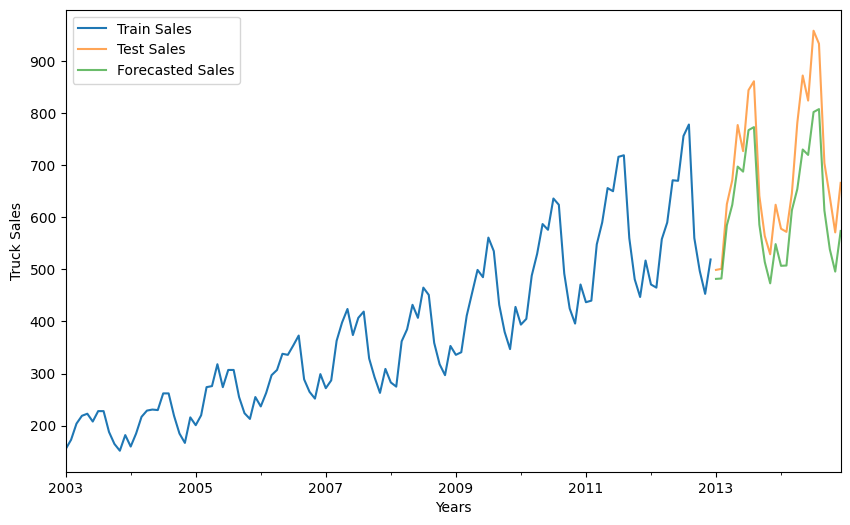

In [80]:
axis = train['Truck-Sales'].plot(label='Train Sales', figsize=(10, 6))
testCopy['Truck-Sales'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy['sales_ts_forecasted'].plot(ax=axis, label='Forecasted Sales', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Truck Sales')
plt.legend(loc='best')
plt.show()
plt.close()

In [81]:
resultsDf3 = pd.DataFrame({'RMSE': rmse}
                           ,index=['Best SARIMA Model : SARIMAX(1, 0, 1)x(1, 0, 1, 12)'])

pd.concat([resultsDf,resultsDf1,resultsDf2,resultsDf3])

,RMSE
"Best AR Model : ARIMA(2,0,0)",306.142152
"Best ARMA Model : ARIMA(3,0,3)",231.408333
"Best ARIMA Model : ARIMA(3,0,3)",231.408333
"Best SARIMA Model : SARIMAX(1, 0, 1)x(1, 0, 1, 12)",84.273197


 **---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

#### <u>Forecast sales using the best fit SARIMA model as per RMSE </u>

In [82]:
# Get forecast 36 steps (3 years) ahead in future
n_steps = 36
pred_uc_99 = best_results.get_forecast(steps=36, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = best_results.get_forecast(steps=36, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [83]:
n_steps = 36
idx = pd.date_range(start='2015-01-01',end='2017-12-31',freq='MS')
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.head()

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
2015-01-01,481.762378,447.700965,518.415208,447.700965,518.415208
2015-02-01,482.501487,441.180879,527.692145,441.180879,527.692145
2015-03-01,584.519022,527.253479,648.004236,527.253479,648.004236
2015-04-01,623.898150,556.123634,699.932313,556.123634,699.932313
2015-05-01,697.297160,614.946600,790.675694,614.946600,790.675694


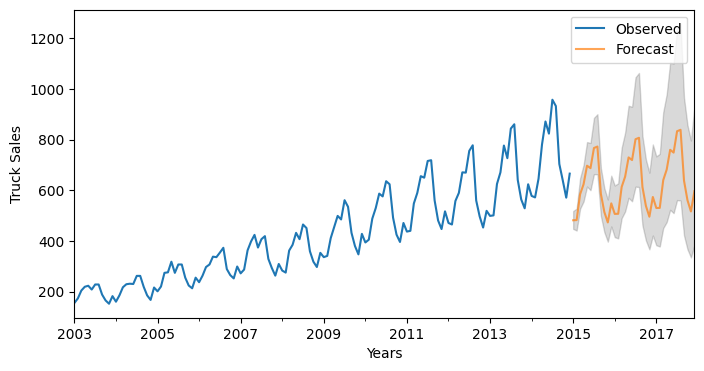

In [84]:
# plot the forecast along with the confidence band

axis = sales_ts.plot(label='Observed', figsize=(8, 4))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.15)
axis.set_xlabel('Years')
axis.set_ylabel('Truck Sales')
plt.legend(loc='best')
plt.show()

#### <u>Plot ACF and PACF for residuals of ARIMA model to ensure no more information is left for extraction</u>

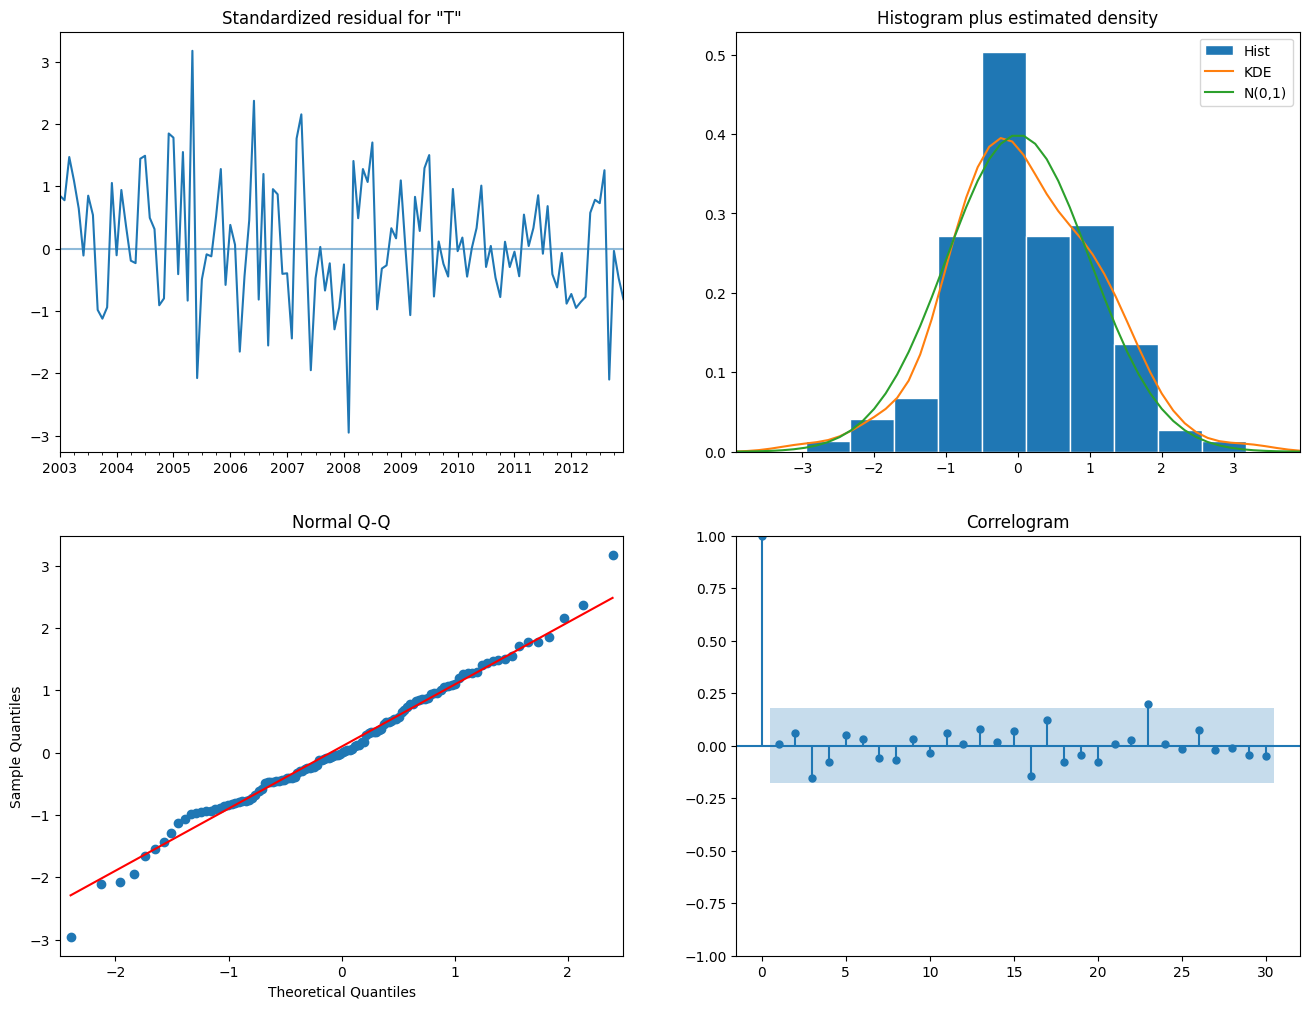

In [85]:
best_results.plot_diagnostics(lags=30, figsize=(16,12))
plt.show()

#### Note : <u>4 plots in the residuals diagnostic plots tell us</u> : 

- **Standardized residuals plot**: <i>The top left plot shows 1-step-ahead standardized residuals. 
    If model is working correctly, then no pattern should be obvious in the residuals which is clearly not visible from the plot as well .</i>



- **Histogram plus estimated density plot**: <i>This plot shows the distribution of the residuals.The orange line shows a smoothed version of this histogram, and the green line shows a normal distribution. If the model is good these two lines should be the same. Here there are small differences between them, which indicate that our model is doing just well enough.</i>



- **Normal Q-Q plot**: <i>The Q-Q plot compare the distribution of residuals to normal distribution. If the distribution of the residuals is normal, then all the points should lie along the red line, except for some values at the end, which is exactly happening in this case.</i>



- **Correlogram plot**: <i>The correlogram plot is the ACF plot of the residuals rather than the data. 95% of the correlations for lag >0  should not be significant (within the blue shades). If there is a significant correlation in the residuals, it means that there is information in the data that was not captured by the model, which is clearly not in this case</i> .

### The entire process of model building till we forecast can be summarized by the <u><font color='blue'>Box Jenkin's Method</font> :</u>

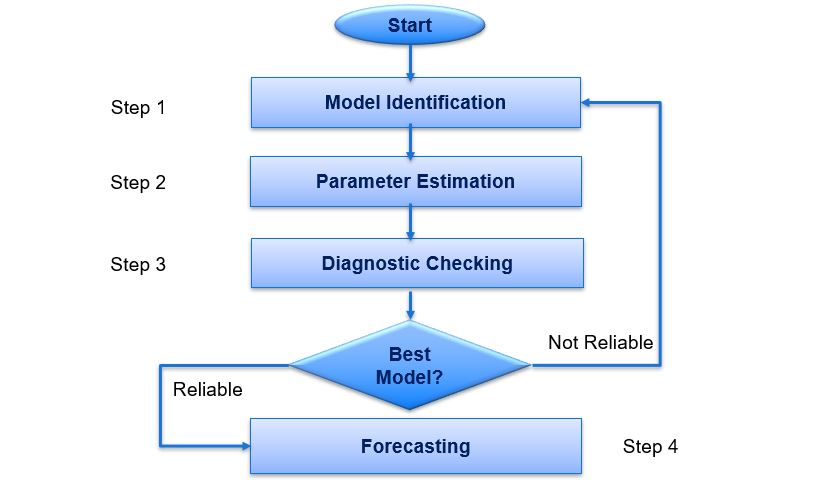

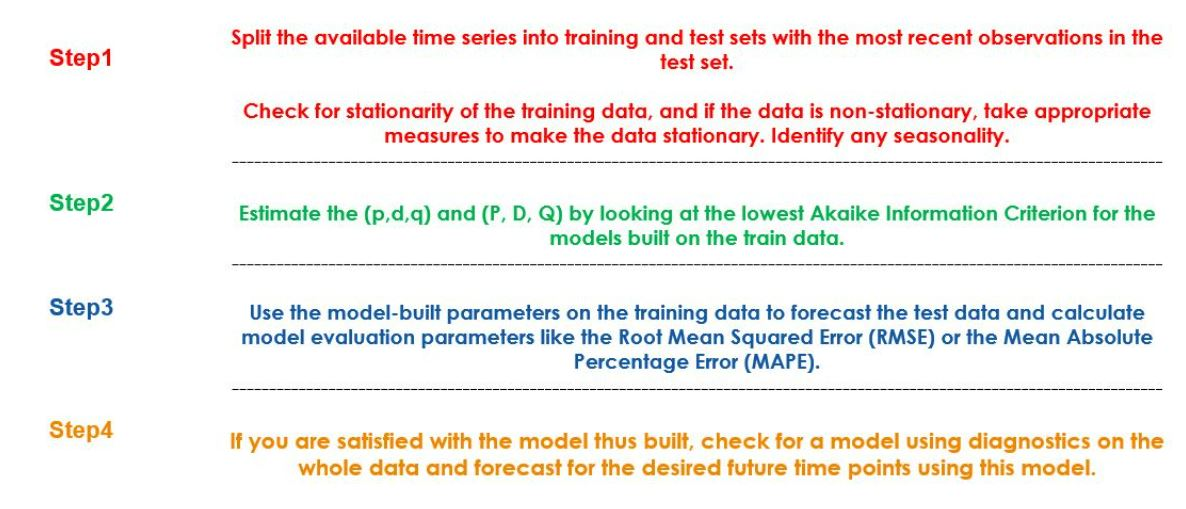

### END